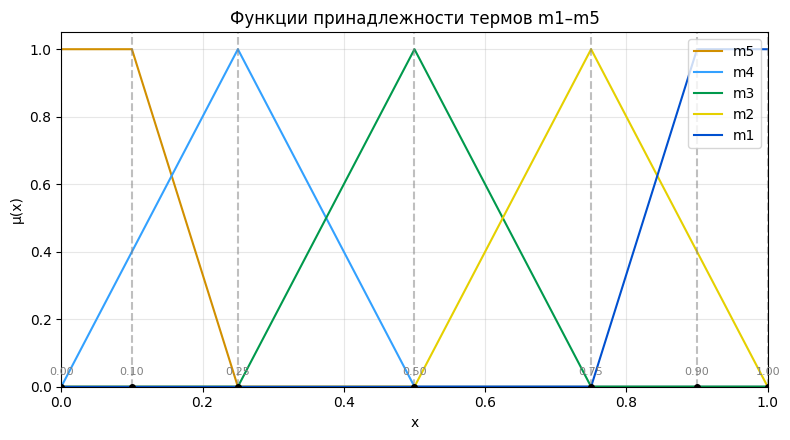

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def pwl(points, xgrid):
    pts = np.array(points, dtype=float)
    xs, ys = pts[:, 0], pts[:, 1]
    return np.interp(xgrid, xs, ys)

x = np.linspace(0, 1, 1001)

m5_pts = [(0.0, 1.0), (0.1, 1.0), (0.25, 0.0)]
m4_pts = [(0.0, 0.0), (0.25, 1.0), (0.5, 0.0)]
m3_pts = [(0.25, 0.0), (0.5, 1.0), (0.75, 0.0)]
m2_pts = [(0.5, 0.0), (0.75, 1.0), (1.0, 0.0)]
m1_pts = [(0.75, 0.0), (0.9, 1.0), (1.0, 1.0)]

m5 = pwl(m5_pts, x)
m4 = pwl(m4_pts, x)
m3 = pwl(m3_pts, x)
m2 = pwl(m2_pts, x)
m1 = pwl(m1_pts, x)

plt.figure(figsize=(8, 4.5))
plt.plot(x, m5, label="m5", color="#d18f00")
plt.plot(x, m4, label="m4", color="#33a1ff")
plt.plot(x, m3, label="m3", color="#00994c")
plt.plot(x, m2, label="m2", color="#e5d000")
plt.plot(x, m1, label="m1", color="#0050d0")

x_points = sorted(set([p[0] for p in m5_pts + m4_pts + m3_pts + m2_pts + m1_pts]))

for x0 in x_points:
    plt.axvline(x=x0, color="gray", linestyle="--", alpha=0.5)
    plt.plot(x0, 0, 'ko', markersize=4)
    plt.text(x0, 0.03, f"{x0:.2f}", ha="center", va="bottom", fontsize=8, color="gray")

plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.title("Функции принадлежности термов m1–m5")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()

plt.show()


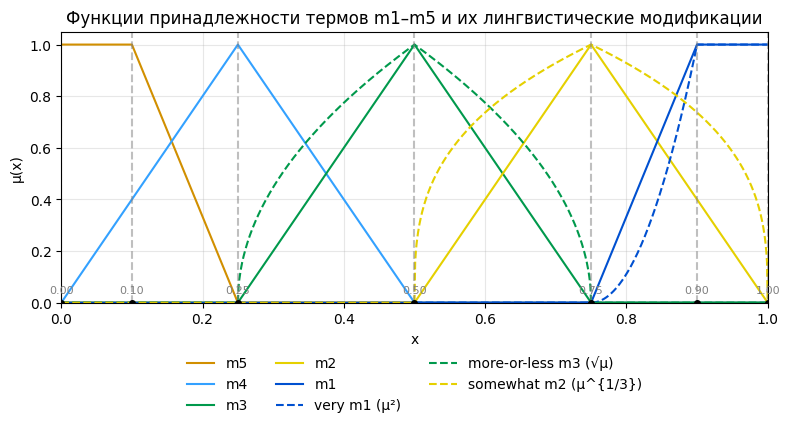

In [11]:
very_m1      = m1 ** 2          # "определённо m1"
moreless_m3  = np.sqrt(m3)      # "более-менее m3"
somewhat_m2  = np.power(m2, 1/3) # "отчасти m2"

plt.figure(figsize=(8, 4.5))
plt.plot(x, m5, label="m5", color="#d18f00")
plt.plot(x, m4, label="m4", color="#33a1ff")
plt.plot(x, m3, label="m3", color="#00994c")
plt.plot(x, m2, label="m2", color="#e5d000")
plt.plot(x, m1, label="m1", color="#0050d0")

plt.plot(x, very_m1,     label="very m1 (μ²)",        linestyle="--", color="#0050d0")
plt.plot(x, moreless_m3, label="more-or-less m3 (√μ)", linestyle="--", color="#00994c")
plt.plot(x, somewhat_m2, label="somewhat m2 (μ^{1/3})", linestyle="--", color="#e5d000")

x_points = sorted(set([p[0] for p in m5_pts + m4_pts + m3_pts + m2_pts + m1_pts]))

for x0 in x_points:
    plt.axvline(x=x0, color="gray", linestyle="--", alpha=0.5)
    plt.plot(x0, 0, 'ko', markersize=4)
    plt.text(x0, 0.03, f"{x0:.2f}", ha="center", va="bottom", fontsize=8, color="gray")

plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel("x")
plt.ylabel("μ(x)")
plt.title("Функции принадлежности термов m1–m5 и их лингвистические модификации")
plt.grid(True, alpha=0.3)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()

plt.show()

/tmp/ipython-input-2352170189.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(mu, x)
/tmp/ipython-input-2352170189.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c = np.trapz(x * mu, x) / area


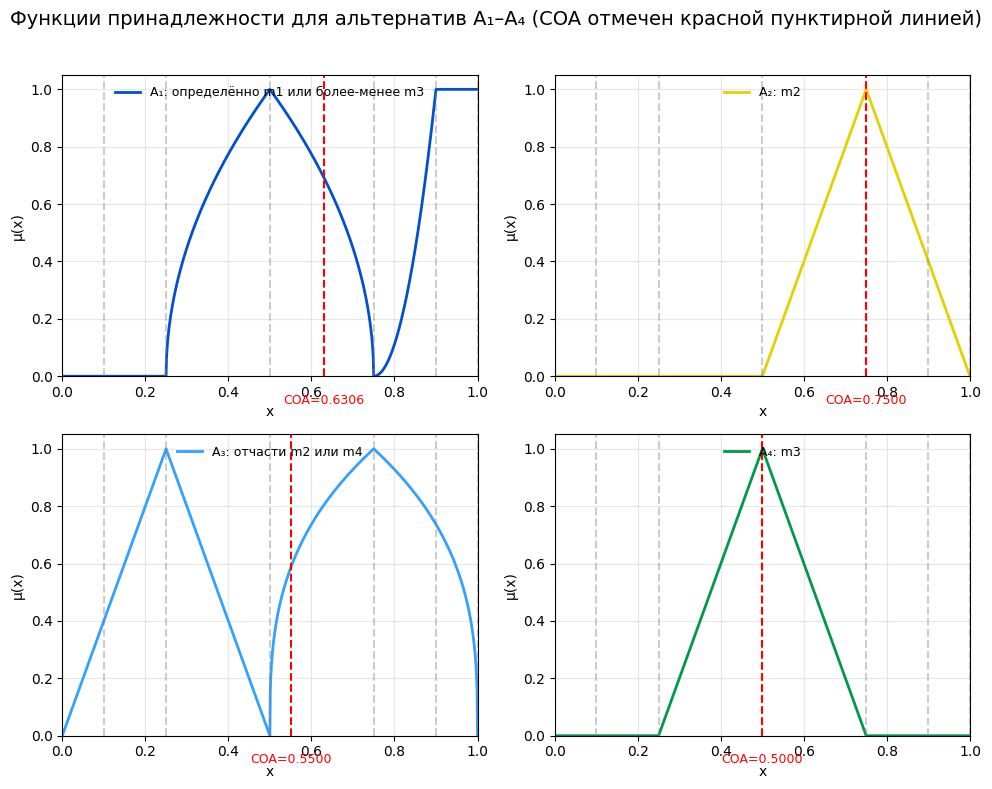

In [15]:
def coa(x, mu):
    area = np.trapz(mu, x)
    if area == 0:
        return np.nan, 0.0
    c = np.trapz(x * mu, x) / area
    return c, area

A1 = np.maximum(very_m1, moreless_m3)  # A1: определённо m1 или более-менее m3
A2 = m2                                # A2: m2
A3 = np.maximum(somewhat_m2, m4)       # A3: отчасти m2 или m4
A4 = m3                                # A4: m3

x_points = [0.0, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

alts = [
    (A1, "A₁: определённо m1 или более-менее m3", "#0050d0"),
    (A2, "A₂: m2",                                  "#e5d000"),
    (A3, "A₃: отчасти m2 или m4",                  "#33a1ff"),
    (A4, "A₄: m3",                                  "#00994c"),
]

for i, (A, label, color) in enumerate(alts):
    ax = axes[i]
    ax.plot(x, A, color=color, linewidth=2, label=label)
    for x0 in x_points:
        ax.axvline(x=x0, color="gray", linestyle="--", alpha=0.4)
    c, area = coa(x, A)
    if not np.isnan(c):
        ax.axvline(c, color="red", linestyle="--", linewidth=1.5)
        ax.text(c, -0.08, f"COA={c:.4f}", color="red",
                ha="center", va="center", fontsize=9, transform=ax.get_xaxis_transform())

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.05)
    ax.set_xlabel("x")
    ax.set_ylabel("μ(x)")
    ax.legend(loc="upper center", frameon=False, fontsize=9)
    ax.grid(True, alpha=0.3)

fig.suptitle("Функции принадлежности для альтернатив A₁–A₄ (COA отмечен красной пунктирной линией)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


/tmp/ipython-input-276006305.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(mu, x)
/tmp/ipython-input-276006305.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (np.trapz(x * mu, x) / area) if area > 0 else np.nan


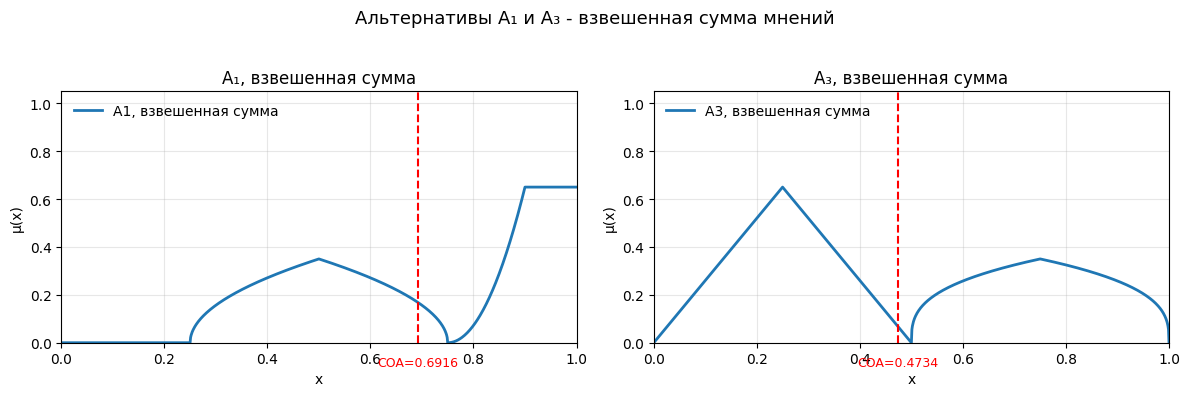

In [17]:
def pwl(points, xgrid):
    pts = np.array(points, dtype=float)
    xs, ys = pts[:, 0], pts[:, 1]
    return np.interp(xgrid, xs, ys)

def coa(x, mu):
    area = np.trapz(mu, x)
    return (np.trapz(x * mu, x) / area) if area > 0 else np.nan

def annotate_coa(ax, c, color="red", y_text=-0.08):
    ax.axvline(c, linestyle="--", color=color, linewidth=1.5)
    ax.text(
        c, y_text, f"COA={c:.4f}", color=color,
        ha="center", va="center",
        fontsize=9, transform=ax.get_xaxis_transform()
    )


w1, w2 = 0.65, 0.35

A1_fwa = w1 * very_m1 + w2 * moreless_m3
A3_fwa = w1 * m4 + w2 * somewhat_m2

A1_coa = coa(x, A1_fwa)
A3_coa = coa(x, A3_fwa)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax3 = axes

ax1.plot(x, A1_fwa, linewidth=2, label="A1, взвешенная сумма")
annotate_coa(ax1, A1_coa)
ax1.set_title("A₁, взвешенная сумма")
ax1.set_xlabel("x"); ax1.set_ylabel("μ(x)")
ax1.set_xlim(0, 1); ax1.set_ylim(0, 1.05)
ax1.grid(alpha=0.3)
ax1.legend(loc="upper left", frameon=False)

ax3.plot(x, A3_fwa, linewidth=2, label="A3, взвешенная сумма")
annotate_coa(ax3, A3_coa)
ax3.set_title("A₃, взвешенная сумма")
ax3.set_xlabel("x"); ax3.set_ylabel("μ(x)")
ax3.set_xlim(0, 1); ax3.set_ylim(0, 1.05)
ax3.grid(alpha=0.3)
ax3.legend(loc="upper left", frameon=False)

fig.suptitle("Альтернативы A₁ и A₃ - взвешенная сумма мнений", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipython-input-276006305.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(mu, x)
/tmp/ipython-input-276006305.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return (np.trapz(x * mu, x) / area) if area > 0 else np.nan


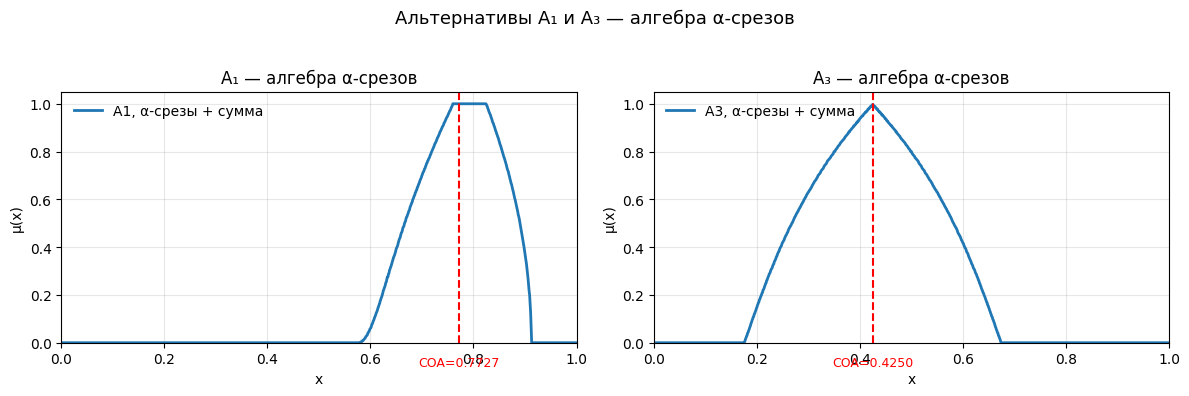

In [18]:
def alpha_cut(x, mu, alpha):
    """Интервал [Lα, Rα] для множества {x: μ(x) >= α} (или (nan, nan), если пусто)."""
    mask = mu >= alpha
    if not np.any(mask):
        return np.nan, np.nan
    xs = x[mask]
    return xs.min(), xs.max()

def alpha_cuts(x, mu, alphas):
    L, R = [], []
    for a in alphas:
        l, r = alpha_cut(x, mu, a)
        L.append(l); R.append(r)
    return np.array(L), np.array(R)

def reconstruct_mu_from_alpha_cuts(x, alphas, L, R):
    """
    Восстановление μ(x) из α-срезов:
    μ_res(x) = max{ α | x ∈ [Lα, Rα] }.
    """
    mu_res = np.zeros_like(x)
    for a, l, r in zip(alphas, L, R):
        if np.isnan(l) or np.isnan(r):
            continue
        mask = (x >= l) & (x <= r)
        mu_res[mask] = np.maximum(mu_res[mask], a)
    return mu_res

def alpha_sum_weighted(mu_a, mu_b, w1, w2, x, alphas):
    """
    (w1 ⊗ A) ⊕ (w2 ⊗ B) через α-срезы:
      A_α=[La,Ra], B_α=[Lb,Rb]
      (w⊗A)_α=[w·La, w·Ra],  сумма: [w1·La + w2·Lb, w1·Ra + w2·Rb]
    Затем восстановить μ(x) из набора интервалов.
    """
    La, Ra = alpha_cuts(x, mu_a, alphas)
    Lb, Rb = alpha_cuts(x, mu_b, alphas)
    La_w, Ra_w = w1 * La, w1 * Ra
    Lb_w, Rb_w = w2 * Lb, w2 * Rb
    Lsum, Rsum = La_w + Lb_w, Ra_w + Rb_w
    return reconstruct_mu_from_alpha_cuts(x, alphas, Lsum, Rsum)


alphas = np.linspace(0, 1, 401) # сетка по α


A1_alpha = alpha_sum_weighted(very_m1, moreless_m3, w1, w2, x, alphas)
A3_alpha = alpha_sum_weighted(m4, somewhat_m2, w1, w2, x, alphas)

A1_coa = coa(x, A1_alpha)
A3_coa = coa(x, A3_alpha)

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x, A1_alpha, linewidth=2, label="A1, α-срезы + сумма")
annotate_coa(ax1, A1_coa)
ax1.set_title("A₁ — алгебра α-срезов")
ax1.set_xlabel("x"); ax1.set_ylabel("μ(x)")
ax1.set_xlim(0, 1); ax1.set_ylim(0, 1.05)
ax1.grid(alpha=0.3)
ax1.legend(loc="upper left", frameon=False)

ax3.plot(x, A3_alpha, linewidth=2, label="A3, α-срезы + сумма")
annotate_coa(ax3, A3_coa)
ax3.set_title("A₃ — алгебра α-срезов")
ax3.set_xlabel("x"); ax3.set_ylabel("μ(x)")
ax3.set_xlim(0, 1); ax3.set_ylim(0, 1.05)
ax3.grid(alpha=0.3)
ax3.legend(loc="upper left", frameon=False)

fig.suptitle("Альтернативы A₁ и A₃ — алгебра α-срезов", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
